# hpg_reserve.csv の内容を確認するnotebook

# 情報まとめ

hpg = ホットペッパーグルメの略称
reserve = 予約  
hpg_reserve.csv = ホットペッパーグルメの予約および来店情報

## インポートおよびhpg_reserve.csvの読み込み

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../script/')
import palade #palade.plotでパレード図を描画
%matplotlib inline

In [2]:
hpg_reserve = pd.read_csv("../data/hpg_reserve.csv")

## hpg_reserveの容量および行列を確認

- 容量  
246576KB ≈ 240.7MB  
- 行列  
2,000,320行 4列

In [3]:
!du ../data/hpg_reserve.csv

246576	../data/hpg_reserve.csv


In [4]:
hpg_reserve.shape

(2000320, 4)

## データのカラム確認

### カラムの意味

- hpg_store_id (String)  
ホットペッパー固有のレストランID
- visit_datetime (String)  
予約時のレストラン訪問予定時間
- reserve_datetime (String)  
予約をした時の時間
- reserve_visitors (int64)  
予約をした時の訪問予定人数

    

In [5]:
hpg_reserve.columns

Index(['hpg_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors'],
      dtype='object')

In [6]:
hpg_reserve.dtypes

hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

### カラムごとのユニーク数

- hpg_store_id (String)  
13,325
- visit_datetime (String)  
9,847
- reserve_datetime (String)  
11,450
- reserve_visitors (int64)  
99

    

In [7]:
hpg_reserve.nunique()

hpg_store_id        13325
visit_datetime       9847
reserve_datetime    11450
reserve_visitors       99
dtype: int64

## 欠損値およびnullの確認

### 欠損値(nullおよび空文字)の確認

In [8]:
hpg_reserve.isnull().any(0) 

hpg_store_id        False
visit_datetime      False
reserve_datetime    False
reserve_visitors    False
dtype: bool

In [9]:
(hpg_reserve == "").any(0)

hpg_store_id        False
visit_datetime      False
reserve_datetime    False
reserve_visitors    False
dtype: bool

### 異常値の確認

### visit_datetime

"2016-01-01 11:00:00"~ "2017-05-31 23:00:00"が格納されている  
異常な日付は確認できない

In [10]:
hpg_reserve["visit_datetime"] = pd.to_datetime(hpg_reserve["visit_datetime"]) #datetimeに変換

In [11]:
print("最も古い日付",hpg_reserve["visit_datetime"].min(),
      "\n最新の日付",hpg_reserve["visit_datetime"].max())

最も古い日付 2016-01-01 11:00:00 
最新の日付 2017-05-31 23:00:00


### reserve_datetime

"2016-01-01 00:00:00"~ "2017-04-22 23:00:00"が格納されている  
異常な日付は確認できない

In [12]:
hpg_reserve["reserve_datetime"] = pd.to_datetime(hpg_reserve["reserve_datetime"]) #datetimeに変換

In [13]:
print("最も古い日付",hpg_reserve["reserve_datetime"].min(),
      "\n最新の日付",hpg_reserve["reserve_datetime"].max())

最も古い日付 2016-01-01 00:00:00 
最新の日付 2017-04-22 23:00:00


### visit_datetime - reserve_datetime

何日、何時間、何分前に予約をしたかを確認  
- 予約時間と訪問時間が同じ場合が存在 (4884行)  
    例: 訪問2016-01-01 17:00:00 　予約2016-01-01 17:00

diff_visit_reserve = 予約時間 - 訪問時間

In [14]:
hpg_reserve["diff_visit_reserve"] = hpg_reserve["visit_datetime"] - hpg_reserve["reserve_datetime"]

diff_visit_reserveの最小値を確認  
'0 days 00:00:00'を確認

In [15]:
hpg_reserve["diff_visit_reserve"].min()

Timedelta('0 days 00:00:00')

予約時間と訪問時間が同じ回数

In [16]:
len(hpg_reserve[hpg_reserve["diff_visit_reserve"] == "0 days 00:00:00"])

4884

diff_visit_reserveの最大値を確認  
'368 days 03:00:00'を確認  
一年前に予約するのは現実的?(異常値なのか不明)

In [17]:
hpg_reserve["diff_visit_reserve"].max()

Timedelta('368 days 03:00:00')

何日前に予約したか

In [18]:
hpg_reserve["diff_visit_reserve_days"] = hpg_reserve["diff_visit_reserve"].map(lambda x: x.days)

### 何日前予約が多いかパレード図でプロット

一週間内の予約が全体の7割を示していることが確認できる

/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


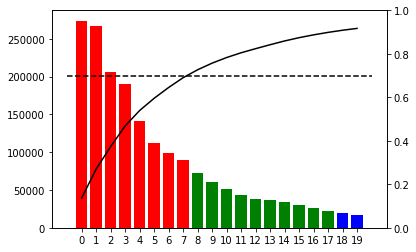

In [19]:
palade.count_plot(hpg_reserve,"diff_visit_reserve_days",x_numbers=20,ABC=True,hline_cum=0.7)

### reserve_visitors

reserve_visitors → 1-100 (92は除く)

In [20]:
print(np.sort(hpg_reserve["reserve_visitors"].unique()))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  93  94  95  96  97  98  99 100]


### 訪問者数でパレード図

/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


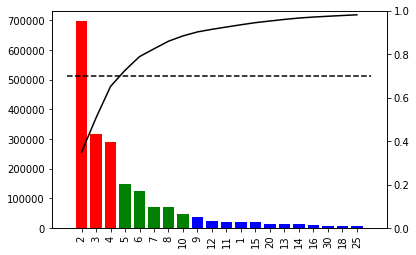

In [21]:
palade.count_plot(hpg_reserve,"reserve_visitors",x_numbers=20,rotation=90,ABC= True,hline_cum=0.7)

### diff_visit_reserve_daysでGroup化して訪問者数合計をパレード図

/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


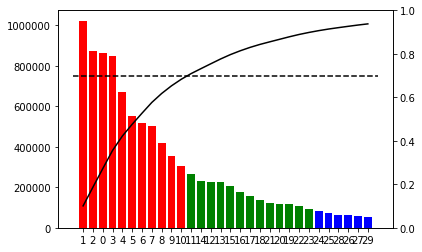

In [24]:
palade.group_sum_plot(hpg_reserve,"diff_visit_reserve_days","reserve_visitors",x_numbers=30,ABC=True,hline_cum = 0.7)